<a href="https://colab.research.google.com/github/guimaraess2/K-Nearest-Neighbors-algorithm/blob/master/Predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**Carregando as bases de dados**

In [27]:
train_df = pd.read_csv('C:/Mauro/Inteligencia_Artificial/Machine_learning/Man_pred_test.csv')
test_df = pd.read_csv('C:/Mauro/Inteligencia_Artificial/Machine_learning/Man_pred_test.csv')

**Manipulação de dados**

In [28]:
df = pd.concat([df_treino, df_teste])
df.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha


In [29]:
df.duplicated( ).sum( )

0

In [30]:
df.sample(4)

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
358,B53529,Baixa,300.1,309.8,1506.0,35.2,21.0,0.0,Sem falha
1772,A37799,Alta,298.8,309.8,1563.0,38.8,65.0,0.0,Sem falha
3695,M16739,Média,298.2,307.7,1608.0,33.8,106.0,0.0,Sem falha
6223,A38486,Alta,297.2,308.1,1770.0,27.2,140.0,0.0,Sem falha


**Dados estatísticos**

In [31]:
df.describe()

,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


**Correlação entre variáveis**

*   A temperatura do ar tem uma **forte correlação** com a temperatura do processo
*   O torque possui uma **fraca correlação** com a velocidade de rotação



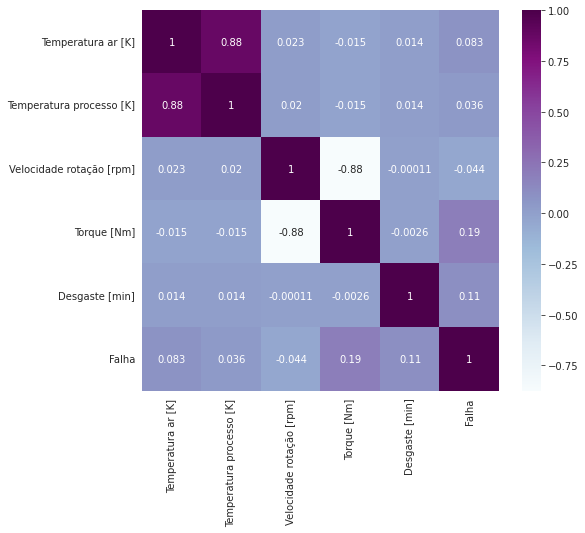

In [32]:
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(8, 7))
sns.heatmap(df.corr(), annot=True, cmap='BuPu');

In [33]:
falhas_tot = df['Falha'].value_counts(normalize=True)
falhas_tot

0.0    0.966911
1.0    0.033089
Name: Falha, dtype: float64

**Visualização dos equipamentos que falharam e não falharam**

Text(0.5, 1.0, 'Contagem')

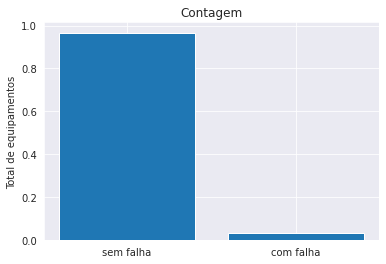

In [34]:
plt.bar(x=falhas_tot.index, height=falhas_tot)
plt.xticks([0,1], ["sem falha", "com falha"])
plt.ylabel("Total de equipamentos")
plt.title('Contagem')


**Análise dos dados**

*   Como mostrado no gráfico abaixo, mais de 30% das falhas foram por **superaquecimento**.




Text(0.5, 1.0, 'Frequencia das falhas')

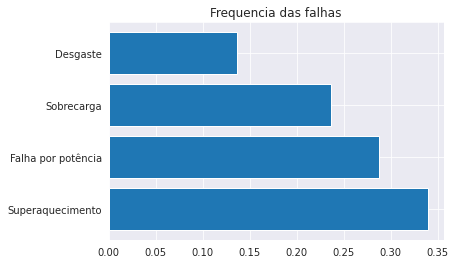

In [35]:
falha_df = df.loc[df['Falha']==1]
sem_falha_df =  df.loc[df['Falha']==0]

falhas_tipo = falha_df['Tipo falha'].value_counts(normalize=True)

plt.barh(y=falhas_tipo.index, width=falhas_tipo)
plt.title("Frequencia das falhas")



**Relação entre falhas e a qualidade do equipamento**

*   Os equipamentos com qualidade baixa são os que mais falham




In [36]:
falha_qualidade = df.groupby('Qualidade')['Falha'].agg(['sum', 'count', 'mean'])
falha_qualidade

,sum,count,mean
Qualidade,,,
Alta,20.0,998,0.020040
Baixa,231.0,5984,0.038603
Média,79.0,2991,0.026413


**Qual o total de componentes possuem qualidade alta, média, e baixa?**

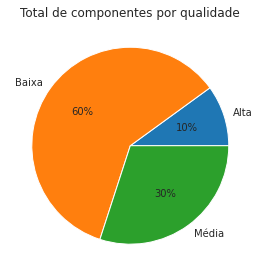

In [37]:
ax = plt.figure(figsize=(15,10))
ax = plt.subplot(1,3,1)
ax = plt.pie(falha_qualidade['count'], labels=falha_qualidade.index, autopct='%.0f%%')
plt.title("Total de componentes por qualidade")
plt.show()

**Qual a relação entre falha e qualidade do componente?**

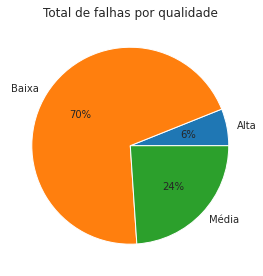

In [38]:
ax = plt.figure(figsize=(15,10))
ax = plt.subplot(1,3,2)
ax = plt.pie(falha_qualidade['sum'], labels=falha_qualidade.index, autopct='%.0f%%')
plt.title("Total de falhas por qualidade")
plt.show()

**A qualidade dos componentes tem influência na falha do equipamento?**

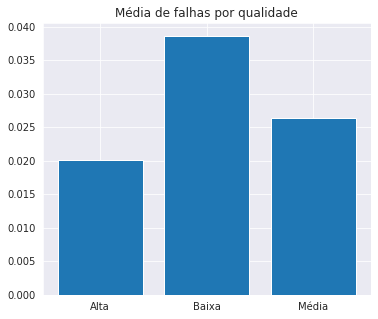

In [39]:
ax = plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,3)
ax = plt.bar(height=falha_qualidade['mean'], x=falha_qualidade.index)
plt.title("Média de falhas por qualidade")
plt.show()

**Análise com base na diferença entre as temperaturas**

In [40]:
temp_var = df[['Temperatura ar [K]', 'Temperatura processo [K]', 'Falha']]
temp_var['var_temp'] = temp_var['Temperatura processo [K]'] - temp_var['Temperatura ar [K]']

temp_com_falha = temp_var[temp_var['Falha'] ==1]
temp_sem_falha = temp_var[temp_var['Falha'] ==0]



**Total de componentes que não falharam**






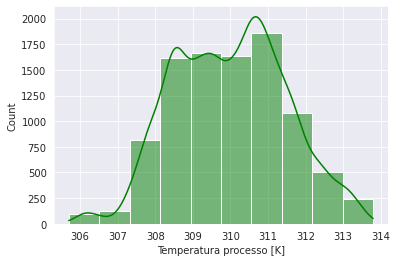

In [41]:
sns.histplot(data=temp_sem_falha['Temperatura processo [K]'], bins=10, kde=True,  color='green' )

**Total de componentes que falharam**


1.   A partir de 310 graus Kelvin os equipamentos tendem a falhar mais.








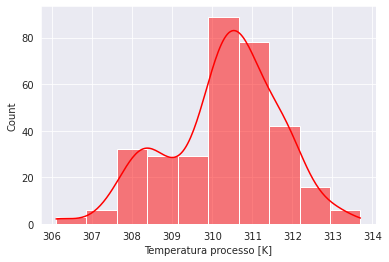

In [42]:
sns.histplot(data=temp_com_falha['Temperatura processo [K]'], bins=10, kde=True,  color='red' )


**Relação entre torque, velocidade de rotação e falha**

1.   Quando o torque é alto e a velocidade é baixa, existe uma tendência a falhas
2.   Quando o torque é baixo e a velocidade é  alta, também apresenta tendência a falhas



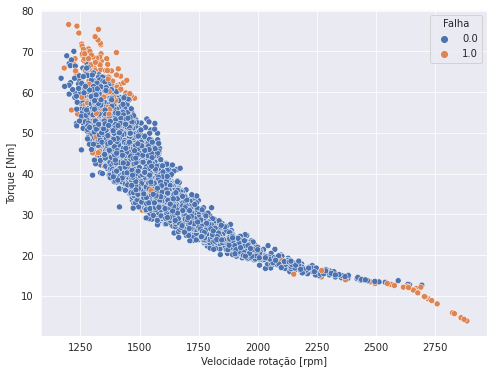

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Velocidade rotação [rpm]', y='Torque [Nm]', palette='deep', hue='Falha')

**Feature Engeneering**

*   Criando um pipeline de dados para otimização escalável para manipulação dos dados.




In [44]:
def pipeline(df):
  df['var_temp'] = df_treino['Temperatura processo [K]'] - df_treino['Temperatura ar [K]']

  dummy = pd.get_dummies(df['Qualidade'])
  df=pd.concat([df.drop('Qualidade', axis=1), dummy], axis=1)
  
  return df

**Aplicando a função na base de dados original**

In [45]:
df_treino = pipeline(df_treino)
df_teste = pipeline(df_teste)
df_treino.head()

,ID Produto,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temp,Alta,Baixa,Média
0,B57099,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha,10.3,0,1,0
1,B50640,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha,8.8,0,1,0
2,B55178,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha,11.2,0,1,0
3,B51337,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento,8.5,0,1,0
4,B56278,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha,10.8,0,1,0


**Segmentação de dados**

In [46]:
drop_col = ['ID Produto','Tipo falha','Falha']

X_treino = df_treino.drop(columns=drop_col)
X_teste = df_teste.drop(columns=drop_col)

y_treino = df_treino['Tipo falha']
y_teste = df_teste['Tipo falha']


**Treinando o modelo**

In [47]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_treino,y_treino)

rf.predict(X_teste)

array(['Sem falha', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

**Aplicando o primeiro modelo de inteligência artifical: Random Forest**

*  O Random Forest obteve uma assertividade de 92%




In [48]:
from sklearn.utils import multiclass
prob_y = rf.predict_proba(X_teste)
roc_auc_score(y_teste, prob_y, multi_class = 'ovo', average='weighted')

0.9243009507542039

**Aplicando o segundo modelo de inteligência artifical: KNN(K-Nearest Neighbor)**

1.   O KNN obteve uma assertividade de 76%




In [49]:
knn = KNeighborsClassifier()
knn.fit(X_treino, y_treino)

y_proba = knn.predict_proba(X_teste)

roc_auc_score(y_teste, y_proba, multi_class='ovo', average='weighted')

0.7646588053549611

**Criando uma conexão com o PowerBI**

In [50]:
file = 'modelo_treinado.sav'
pickle.dump(rf, open(file, 'wb'))
